In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
teleData=np.genfromtxt(fname='C:\\Users\\Rebecca\\Documents\\TL Study Docs\\ML\\Dataset\\teleCust1000t.csv',delimiter=',',dtype=float)

In [5]:
teleData=pd.read_csv("C:\\Users\\Rebecca\\Documents\\TL Study Docs\\ML\\Dataset\\teleCust1000t.csv")

In [6]:
type(teleData)

pandas.core.frame.DataFrame

In [7]:
teleData.head(1)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1


In [9]:
teleData.size

12000

In [10]:
len(teleData)

1000

In [11]:
teleData['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD89BD20F0>]],
      dtype=object)

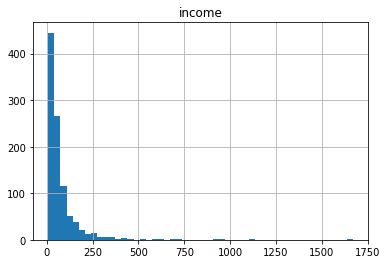

In [16]:
teleData.hist(column='income',bins=50)

In [17]:
teleData.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [24]:
X=teleData[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [25]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [30]:
Y=teleData['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalize Data

In [32]:
X=preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [33]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=101)

In [34]:
print('Train set: ',Xtrain.shape,Ytrain.shape)

Train set:  (700, 11) (700,)


In [35]:
print('Test Set: ',Xtest.shape,Ytest.shape)

Test Set:  (300, 11) (300,)


### Classfication

## K nearest Neighbour KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
k=5

In [38]:
neigh=KNeighborsClassifier(n_neighbors=k).fit(Xtrain,Ytrain)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
yhat=neigh.predict(Xtest)

In [40]:
yhat[0:5]

array([2, 2, 1, 3, 1], dtype=int64)

In [41]:
np.unique(yhat)

array([1, 2, 3, 4], dtype=int64)

### Accuracy Evaluation

In [42]:
from sklearn import metrics

In [51]:
print("Test Accuracy is ",metrics.accuracy_score(Ytest,yhat))

Test Accuracy is  0.3566666666666667


In [50]:
print("Train Accuracy is ",metrics.accuracy_score(Ytrain,neigh.predict(Xtrain)))

Train Accuracy is  0.5314285714285715


In [46]:
metrics.confusion_matrix(Ytrain,neigh.predict(Xtrain))

array([[133,  13,  30,  14],
       [ 39,  71,  24,  14],
       [ 58,  27, 110,   9],
       [ 44,  29,  27,  58]], dtype=int64)

In [49]:
metrics.confusion_matrix(Ytest,yhat)

array([[39, 14, 15,  8],
       [22, 21, 17,  9],
       [17, 19, 36,  5],
       [28, 29, 10, 11]], dtype=int64)

In [52]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kFold=model_selection.KFold(n_splits=10,random_state=101)
modelCV=KNeighborsClassifier(n_neighbors=5)
scoring='accuracy'
results=model_selection.cross_val_score(modelCV,Xtrain,Ytrain,cv=kFold,scoring=scoring)
print(results.mean())

0.2928571428571428
